# CH8: Dimensionality Reduction Exercises

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics  import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

In [3]:
mnist = fetch_openml('mnist_784',as_frame=False,parser='auto')

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
X_train,X_test, y_train,y_test = train_test_split(mnist.data,mnist.target,train_size=6/7,random_state=42)

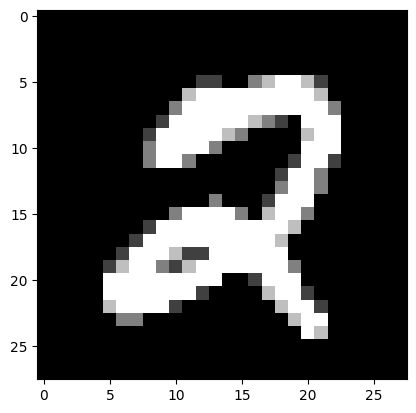

In [6]:
plt.imshow(X_train[0].reshape(28,28),cmap='gray')
plt.show()

## RandomForest

In [7]:
%%time

rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(X_train,y_train)

CPU times: user 52 s, sys: 143 ms, total: 52.2 s
Wall time: 52.3 s


RandomForestClassifier(random_state=42)

In [8]:
train_pred = rfmodel.predict(X_train)
test_pred = rfmodel.predict(X_test)
print('Training Accuracy',accuracy_score(y_train,train_pred))
print('Test Accuracy',accuracy_score(y_test,test_pred))

Training Accuracy 1.0
Test Accuracy 0.9674


In [9]:
%%time
pca = PCA(n_components=.95)
X_trainP = pca.fit_transform(X_train)
X_testP = pca.transform(X_test)

CPU times: user 22.2 s, sys: 2.01 s, total: 24.2 s
Wall time: 14.5 s


In [18]:
X_trainP.shape

(60000, 154)

In [10]:
%%time

rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(X_trainP,y_train)

CPU times: user 2min 13s, sys: 224 ms, total: 2min 13s
Wall time: 2min 15s


RandomForestClassifier(random_state=42)

#### Evaluation after PCA transformation

In [11]:
train_pred = rfmodel.predict(X_trainP)
test_pred = rfmodel.predict(X_testP)
print('Training Accuracy',accuracy_score(y_train,train_pred))
print('Test Accuracy',accuracy_score(y_test,test_pred))

Training Accuracy 1.0
Test Accuracy 0.9469


## SGD

In [12]:
%%time
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train,y_train)

CPU times: user 3min 47s, sys: 343 ms, total: 3min 48s
Wall time: 3min 49s


SGDClassifier(random_state=42)

In [13]:
train_pred = sgd.predict(X_train)
test_pred = sgd.predict(X_test)
print('Training Accuracy',accuracy_score(y_train,train_pred))
print('Test Accuracy',accuracy_score(y_test,test_pred))

Training Accuracy 0.8767333333333334
Test Accuracy 0.8691


In [14]:
%%time
sgd = SGDClassifier(random_state=42)
sgd.fit(X_trainP,y_train)

CPU times: user 56.6 s, sys: 109 ms, total: 56.7 s
Wall time: 57.1 s


SGDClassifier(random_state=42)

### Evaluation after PCA transformation

In [15]:
train_pred = sgd.predict(X_trainP)
test_pred = sgd.predict(X_testP)
print('Training Accuracy',accuracy_score(y_train,train_pred))
print('Test Accuracy',accuracy_score(y_test,test_pred))

Training Accuracy 0.8934666666666666
Test Accuracy 0.8907


>Observation:
  - Random Forest without applying transformation fit to data quickly ~`1 min` and faster than when PCA transformation applied takes ~`2 min`, without any enhancement in the performance or genralization; but loosing about `2%` accuarcy on testset.
  - SGD classifier takes about `4 min` to fit the original data compared to `49s`  when PCA applied, with enhancement in the overall performance and generalize well.

  so there you have it: PCA can give you a formidable speedup, and if you're lucky a performance boost... but it's really not guaranteed: it depends on the model and the dataset!